In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# Consider a data distribution represented by a truncated Gaussian
# with a mean at 100 that only consists of positive values.
# We can loosely consider this as a measurement of the amount of 
# noise in terms of pressure magnitude we hear in the Wegman's hall foyer.
samples = np.random.normal(loc = 100, scale=85, size=5000000)
samples = samples[samples > 0]

In [96]:
# Two scientists wish to sample the noise and determine what is the most 
# likely level of noise (i.e. the mode, or the max in a histogram/pdf)
# Scientist A uses a measurement device that measures the sound wave's amplitude.
# Scientist B uses a measurement device that measures the sound's amplitude on a log scale
# Assuming their devices are noise free and they sample at the same times, below is a
# representation of their data input
samplesA = samples 
samplesB = np.log(samplesA)

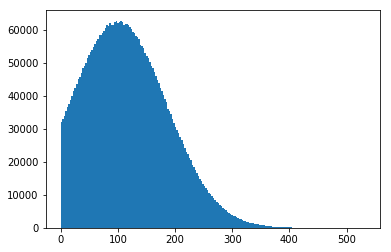

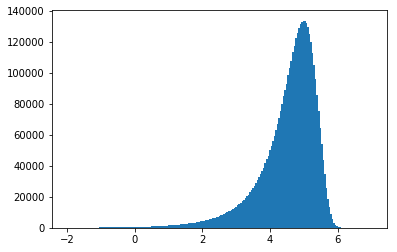

In [97]:
# Here are the histograms of their data
nA, binsA, patchesA = plt.hist(samplesA, bins=200)
plt.show()
nB, binsB, patchesB = plt.hist(samplesB, bins=np.linspace(-2,7,200))
plt.show()

In [98]:
# Where do the peaks in each histogram occur?
mlA = binsA[np.argmax(nA)]
print('ml for A:',mlA)
mlB = binsB[np.argmax(nB)]
print('ml for B:',mlB)

ml for A: 103.84645378654992
ml for B: 4.964824120603016


In [99]:
# now if we take the maximum value from B and convert that back into 
# the same linear scale that A uses, we see they correspond to different 
# values
mlBA = np.exp(mlB)
print('exp(ml for B) :',mlBA)
print('not equal to ml for A!:', mlA)

exp(ml for B) : 143.2833474683312
not equal to ml for A!: 103.84645378654992


The type of measurement tool you use changes what you consider to be the maximum likelihood measurement. This makes the maximum likelihood solution less trustworthy, as it is partially an artifact of your representation scheme. A researcher could manipulate the "ideal solution" by just changing the input representation with a rather innocuous looking transform. For example, if the data is squared error instead of error, this nonlinear transform will effect the ML solution. Similarly, a log scale vs a linear scale will have the effect we saw in the above example. 